#Project Title: Historical Automobile Sales Analysis During Recession Periods

##Objective:

The aim of this project is to analyze historical automobile sales data to understand the impact of recession periods on automobile sales. By examining various economic and market factors, such as GDP, unemployment rates, consumer confidence, vehicle pricing, and competition, we will uncover trends and patterns in automobile sales during recessionary periods and compare them with non-recession periods.

##Recession Periods Analyzed:

1980 - Recession Period 1

1981-1982 - Recession Period 2

1991 - Recession Period 3

2000-2001 - Recession Period 4

2007-2009 - Recession Period 5 (Global Financial Crisis)

2020 - Recession Period 6 (COVID-19 Pandemic)

##Data Description:
The dataset contains historical automobile sales data, which includes various factors influencing automobile purchases, specifically during recession and non-recession periods. The following variables are included in the dataset:

Date: Observation date

Recession: Binary indicator for recession periods (1 = recession, 0 = normal)

Automobile_Sales: Number of vehicles sold

GDP: Per capita GDP value in USD

Unemployment_Rate: Monthly unemployment rate

Consumer_Confidence: Index representing consumer confidence

Seasonality_Weight: Seasonal effect on automobile sales

Price: Average vehicle price

Advertising_Expenditure: Advertising expenditures

Vehicle_Type: Type of vehicles sold (e.g., Superminicar, Small Family Car, Medium Family Car, Executive Car, Sports)

Competition: Measure of competition in the market (number of competitors or market share)

Month: Month of observation

Year: Year of observation

##Methodology:
Through visualizations such as time-series plots, bar charts, and scatter plots, the project aims to examine the trends in automobile sales relative to the factors mentioned above during recessionary and non-recessionary periods. The insights will help understand how recessions affect consumer behavior, the automobile market, and the sales dynamics of different vehicle types.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
# URL for the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Download the dataset directly into a pandas DataFrame
df = pd.read_csv(URL)

# Output a success message
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

##Creating Visualizations for Data Analysis¶

###TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [ ]:
print(df.dtypes)

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object


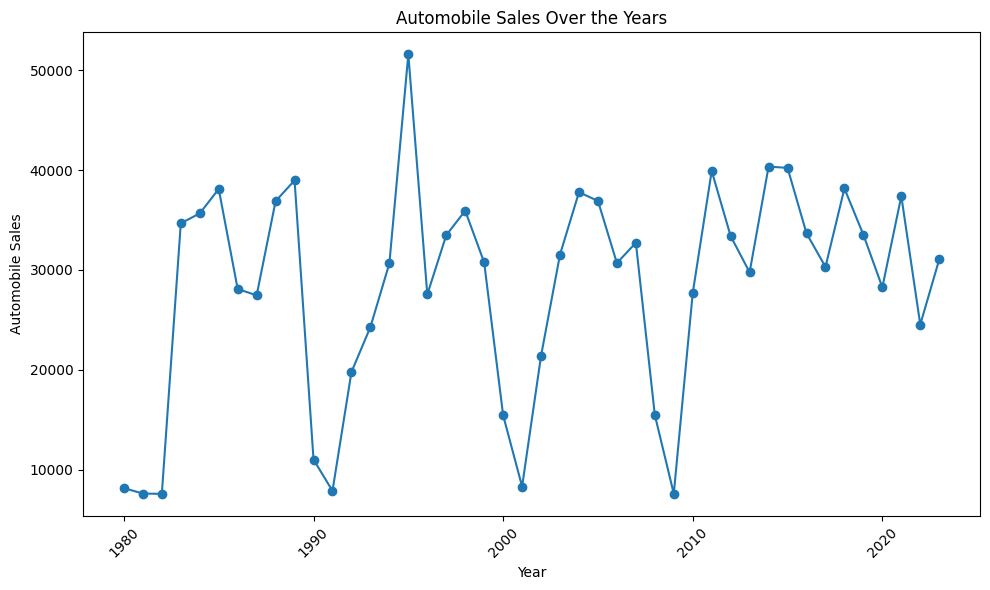

In [ ]:
#converting the date to date time as it is an object
df['Date']= pd.to_datetime(df['Date'])
#grouping the sales by years and sum
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

#plotting
plt.figure(figsize=(10,6))
plt.plot(yearly_sales['Year'], yearly_sales['Automobile_Sales'], marker='o', linestyle="-")
plt.title('Automobile Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid =(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

##TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

<Figure size 1600x800 with 0 Axes>

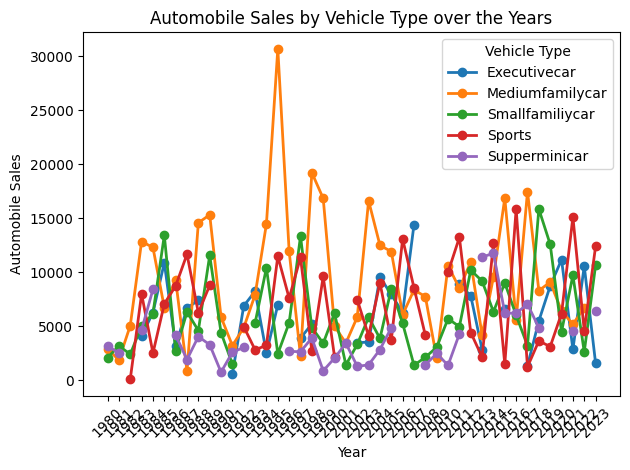

In [ ]:
#Group by year and Vehicle type, summing sales
vehicle_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
#plotting
plt.figure(figsize=(16,8))
vehicle_sales.plot(marker='o', linewidth = 2)
plt.title('Automobile Sales by Vehicle Type over the Years')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid = (True)
plt.xticks(vehicle_sales.index, rotation = 45)
plt.legend(title = 'Vehicle Type')
plt.tight_layout()
plt.show()

##**From the above plot, what insights have you gained on the sales of various vehicle types?**
###*Sports cars and supermini cars demonstrate resilience or growth during recession periods.Medium family cars and, to a lesser extent, small family cars show more sensitivity to economic changes, with less consistent trends.The upward trend in sports vehicles sales indicates the stability of the luxury market, even during economic downturns.*

##TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

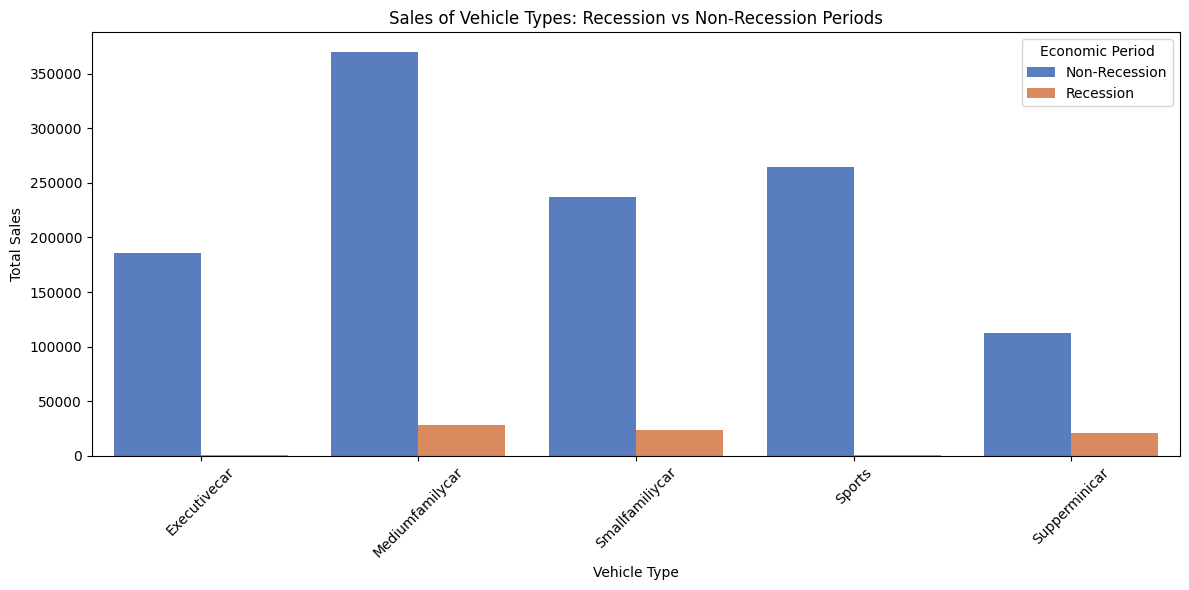

In [ ]:
# Total sales per vehicle type during recession vs non-recession
grouped = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()
grouped['Recession'] = grouped['Recession'].map({1: 'Recession', 0: 'Non-Recession'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Vehicle_Type', y='Automobile_Sales', hue='Recession', palette='muted')
plt.title('Sales of Vehicle Types: Recession vs Non-Recession Periods')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Economic Period')
plt.tight_layout()
plt.show()

##TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

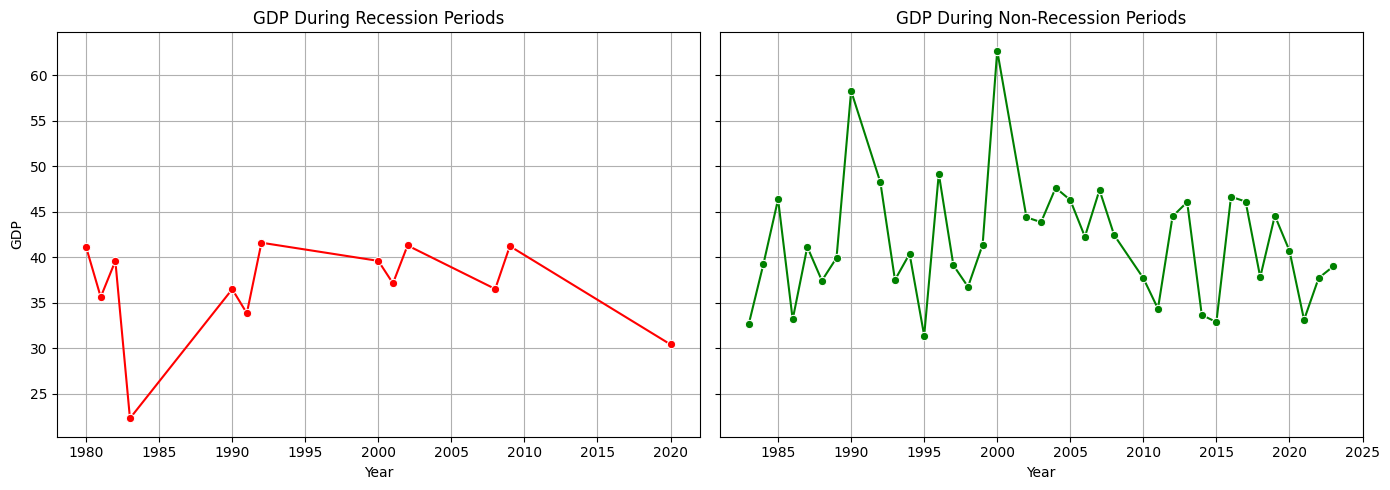

In [ ]:
# Separate the data
recession_data = df[df['Recession'] == 1].groupby('Year')['GDP'].mean().reset_index()
non_recession_data = df[df['Recession'] == 0].groupby('Year')['GDP'].mean().reset_index()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Recession plot
sns.lineplot(data=recession_data, x='Year', y='GDP', marker='o', ax=axes[0], color='red')
axes[0].set_title('GDP During Recession Periods')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

# Non-recession plot
sns.lineplot(data=non_recession_data, x='Year', y='GDP', marker='o', ax=axes[1], color='green')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].set_xlabel('Year')
axes[1].grid(True)

# Layout
plt.tight_layout()
plt.show()

##TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

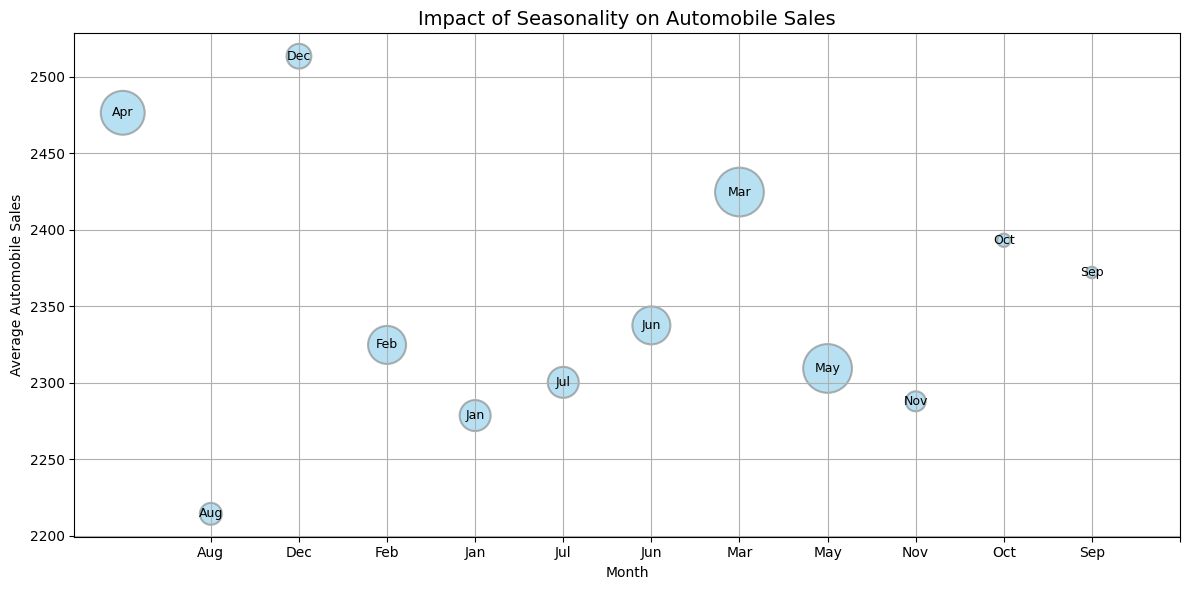

In [ ]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(plt)  # Reloads matplotlib.pyplot to restore default functions
# Average sales and seasonality weight by month
bubble_data = df.groupby('Month')[['Automobile_Sales', 'Seasonality_Weight']].mean().reset_index()

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    bubble_data['Month'],
    bubble_data['Automobile_Sales'],
    s=bubble_data['Seasonality_Weight'] * 1000,  # Scale bubble size
    alpha=0.6,
    color='skyblue',
    edgecolors='grey',
    linewidth=1.5
)

# Labels and Title
plt.title('Impact of Seasonality on Automobile Sales', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Automobile Sales')
plt.xticks(range(1, 13))
plt.grid(True)

# Add labels on bubbles
for i in range(bubble_data.shape[0]):
    plt.text(
        bubble_data['Month'][i],
        bubble_data['Automobile_Sales'][i],
        str(bubble_data['Month'][i]),
        ha='center', va='center', fontsize=9
    )

plt.tight_layout()
plt.show()

##TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.¶
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

In [ ]:
# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Group by year and compute mean for relevant columns
recession_grouped = recession_df.groupby('Year')[
    ['Automobile_Sales', 'Price', 'Consumer_Confidence']
].mean().reset_index()


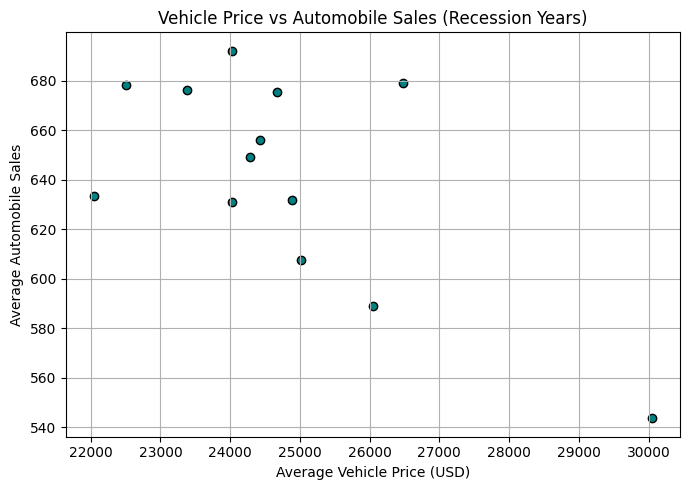

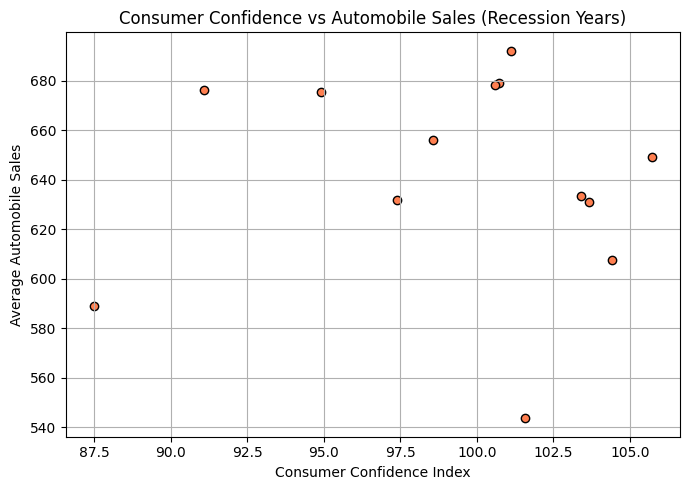

In [ ]:
#Scatter Plot: Vehicle Price vs Automobile Sales
plt.figure(figsize=(7, 5))
plt.scatter(recession_grouped['Price'], recession_grouped['Automobile_Sales'], color='teal', edgecolors='black')
plt.title('Vehicle Price vs Automobile Sales (Recession Years)')
plt.xlabel('Average Vehicle Price (USD)')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#Scatter Plot: Consumer Confidence vs Automobile Sales
plt.figure(figsize=(7, 5))
plt.scatter(recession_grouped['Consumer_Confidence'], recession_grouped['Automobile_Sales'], color='coral', edgecolors='black')
plt.title('Consumer Confidence vs Automobile Sales (Recession Years)')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

##TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.¶

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

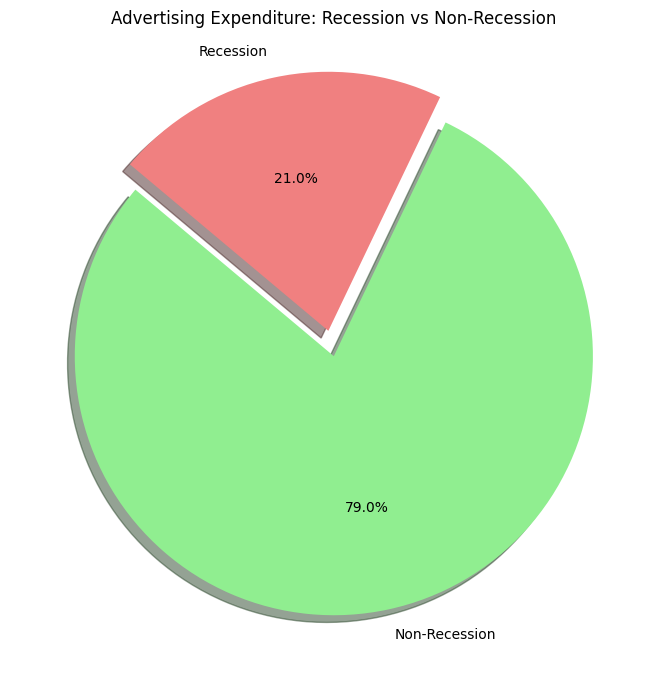

In [ ]:
# Group and sum advertising expenditure by recession status
ad_expense = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Labels
labels = ['Non-Recession', 'Recession']

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    ad_expense,
    labels=labels,
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=140,
    explode=(0, 0.1),
    shadow=True
)

plt.title('Advertising Expenditure: Recession vs Non-Recession')
plt.tight_layout()
plt.show()

###It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

##TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
¶
Can we observe the share of each vehicle type in total expenditure during recessions?

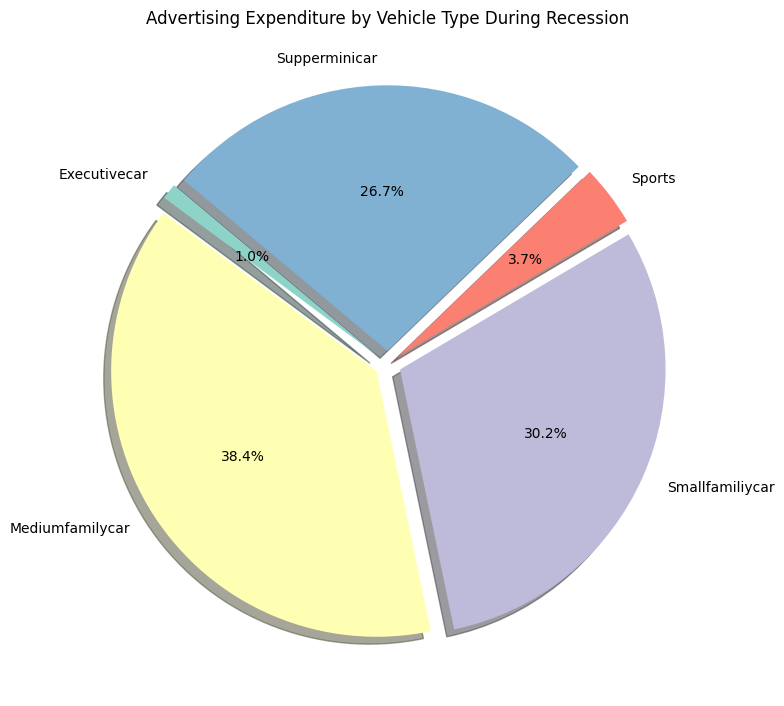

In [ ]:
# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Group by vehicle type and sum advertising expenditure
ad_by_vehicle = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ad_by_vehicle,
    labels=ad_by_vehicle.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(ad_by_vehicle),
    shadow=True,
    colors=plt.cm.Set3.colors  # A nice color palette
)

plt.title('Advertising Expenditure by Vehicle Type During Recession')
plt.tight_layout()
plt.show()

###During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

##TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

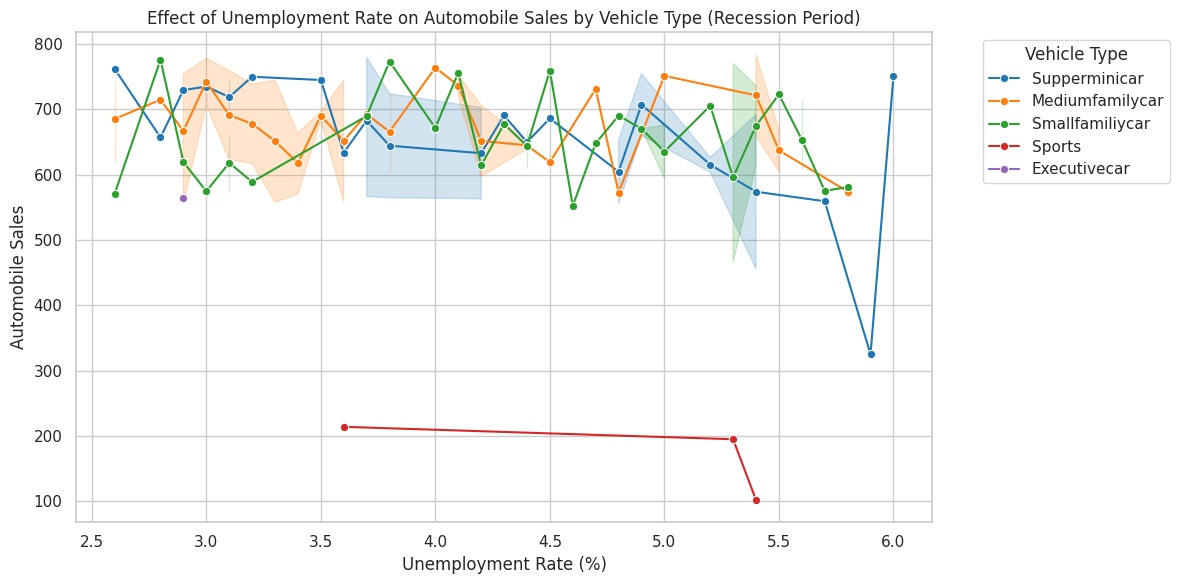

In [ ]:
import seaborn as sns
# Filter for recession period only
recession_df = df[df['Recession'] == 1]

# Set plot style
sns.set(style="whitegrid")

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=recession_df,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    marker='o',
    palette='tab10'
)

# Customize plot
plt.title('Effect of Unemployment Rate on Automobile Sales by Vehicle Type (Recession Period)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

## TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
filename = "us-states.json"

# Download the file
urllib.request.urlretrieve(url, filename)

print("File downloaded:", filename)


File downloaded: us-states.json


In [ ]:
import folium

# Filter data for the recession period
recession_data = df[df['Recession'] == 1]

# Group by State instead of City for mapping
sales_by_state = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create base map
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add choropleth layer using us-states.json
choropleth = folium.Choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=sales_by_state,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession',
).add_to(map1)

# Add tooltips
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1


##**Author**
###*Abrar Hussain*